In [1]:
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
face_cascade_path = 'haarcascade_frontalface_default.xml'
image_path = '1.jpg'

In [3]:
# Download the 'haarcascade_frontalface_default.xml' from "https://github.com/opencv/opencv/tree/master/data/haarcascades"
# check if XML file exists
if not os.path.exists(face_cascade_path):
    print(f"Error: Haar Cascade file not found at {face_cascade_path}.")
    exit() # Exit if the file is not found

# Load the pre-trained Haar Cascade Classifier
face_cascade = cv2.CascadeClassifier(face_cascade_path)

In [4]:
# Load input image
img = cv2.imread(image_path)

if img is None:
    print(f"Error: Could not find the image at {image_path}. Please check the path again")
    exit()

In [5]:
# Convert the image into grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [15]:
# Perform Face Detection
# detectMultiScale(image, scaleFactor, minNeighbors, minSize)
# image - the grayscale image
# scaleFactor - Parameter specifying how much the image size is reduced at each scale (Smaller values increase accuracy but slows detection)
# minNeighbors - How many neighbors each candidate rectangle should have to retain it ( Higher values reduce false positives but miss some faces)
# minSize - Minimum possible object size. Objects smaller than that are ignored.

faces = face_cascade.detectMultiScale(
    gray_img,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(50,50) # Minimum face size
)

print(f"\nFound {len(faces)} face(s) in the image")


Found 26 face(s) in the image


In [16]:
# Draw bounding boxes around the detected faces
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0, 0), 2)

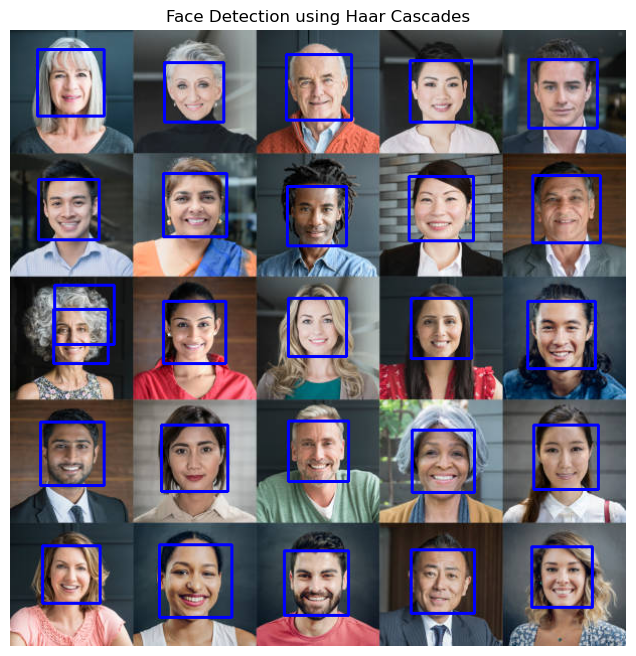

In [17]:
# Display the result
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 8))
plt.imshow(img_rgb)
plt.title('Face Detection using Haar Cascades')
plt.axis('off') # Hide axes
plt.show()

In [18]:
output_image_path = 'faces_detected.jpg'
cv2.imwrite(output_image_path, img)
print(f"Image with detected faces saved to {output_image_path}")

Image with detected faces saved to faces_detected.jpg
